In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [2]:
def create_diamond_filter(size):
    # Ensure the size is odd
    if size % 2 == 0:
        size += 1
    
    # Create an empty mask
    mask = np.zeros((size, size), dtype=np.uint8)
    
    # Get the center of the mask
    center = size // 2
    
    # Create the diamond shape
    for i in range(size):
        for j in range(size):
            if abs(i - center) + abs(j - center) <= center:
                mask[i, j] = 1
    
    return mask

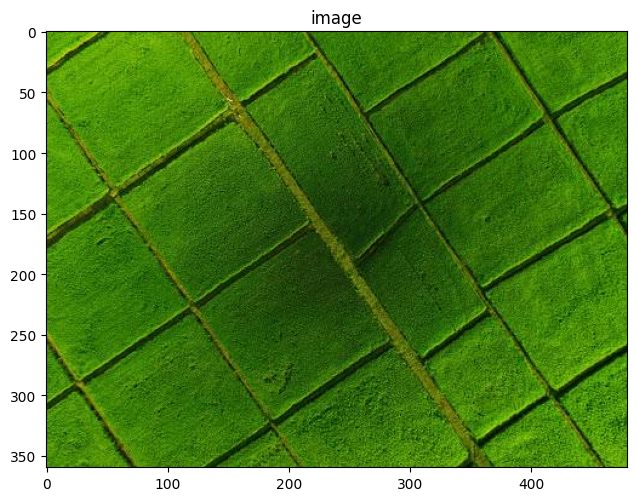

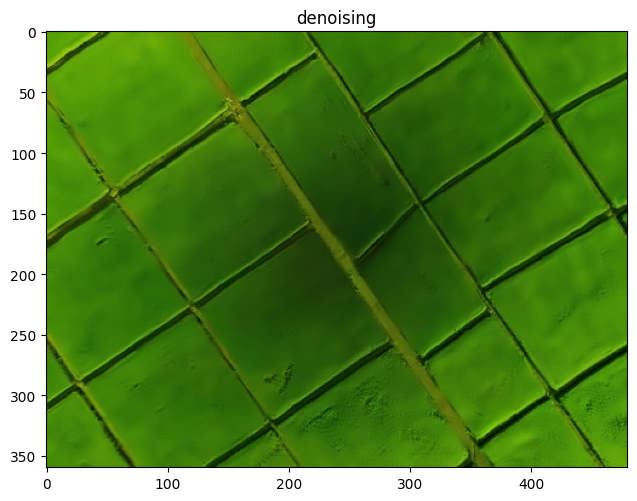

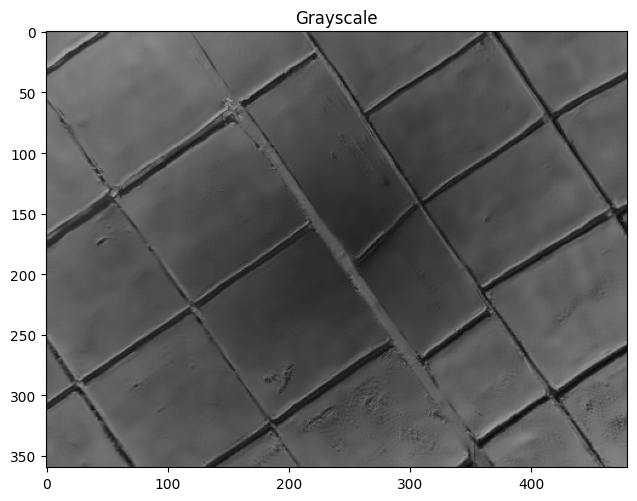

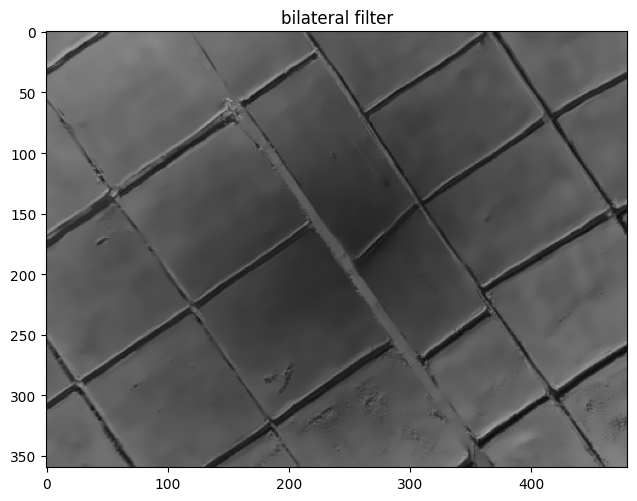

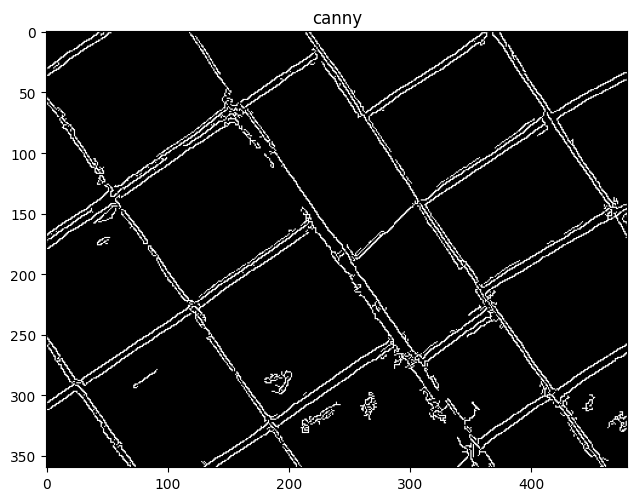

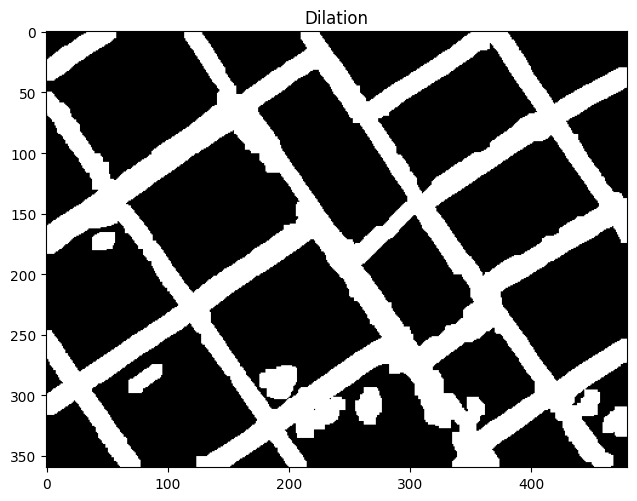

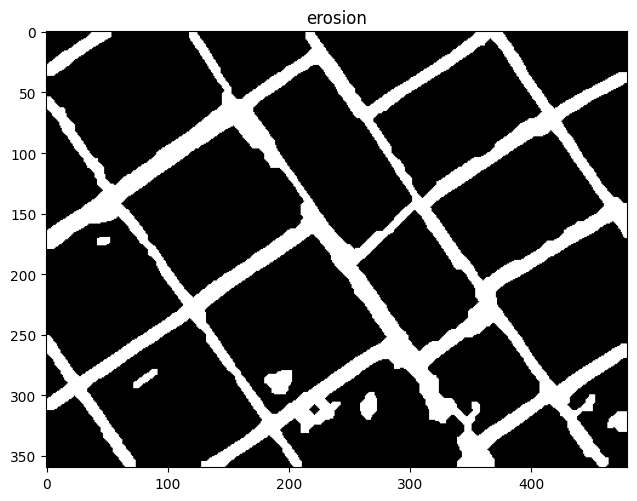

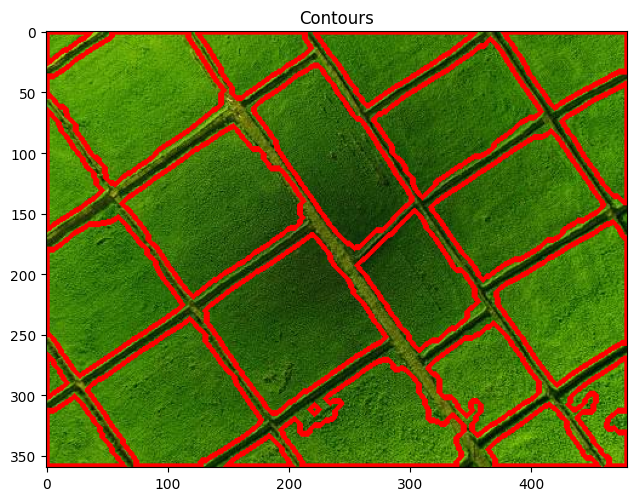

In [3]:
image = cv2.imread('C:/Users/My/Desktop/HW3_MULTI/farms_2.jpeg')
imshow('image', image)

denoising = cv2.fastNlMeansDenoisingColored(image, None,11,11, 9,11)#Non-Local Means
imshow('denoising', denoising)

gray = cv2.cvtColor(denoising, cv2.COLOR_BGR2GRAY)
imshow("Grayscale", gray)

filtered_image = cv2.bilateralFilter(gray,9, 5, 5) #sigmaColor,sigmaSpace
imshow("bilateral filter", filtered_image)

edged=cv2.Canny(filtered_image, 20, 225)
imshow("canny", edged)

kernel1 = np.ones((9,9), np.uint8)
dilation = cv2.dilate(edged, kernel1, iterations = 1)
imshow('Dilation', dilation)

kernel=create_diamond_filter(9)
erosion = cv2.erode(dilation, kernel, iterations=1)
imshow('erosion', erosion)

copy = image.copy()
contours, hierarchy = cv2.findContours(image=cv2.bitwise_not(erosion), mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
pic_con = cv2.drawContours(copy, contours, -1, color=(0, 0, 255), thickness=5)
image = cv2.imread('C:/Users/My/Desktop/HW3_MULTI/farms_2.jpeg')
cv2.drawContours(image, contours, -1, (0,0,255), 4)

imshow('Contours', image)

In [103]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 24


In [104]:
def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

In [105]:
print("num of cnt = " + str(len(contours)))
print("Contor Areas before sorting...")
print(get_contour_areas(contours))

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
print("Contor Areas after sorting...") 
print(get_contour_areas(sorted_contours))

num of cnt = 24
Contor Areas before sorting...
[733.0, 2639.5, 32.0, 2382.5, 8031.0, 2282.5, 324.0, 4538.5, 10371.0, 11837.0, 8986.5, 9231.5, 5964.5, 9110.0, 11329.5, 2385.0, 3023.0, 9616.5, 8693.5, 4124.0, 4192.0, 3016.5, 11208.5, 495.5]
Contor Areas after sorting...
[11837.0, 11329.5, 11208.5, 10371.0, 9616.5, 9231.5, 9110.0, 8986.5, 8693.5, 8031.0, 5964.5, 4538.5, 4192.0, 4124.0, 3023.0, 3016.5, 2639.5, 2385.0, 2382.5, 2282.5, 733.0, 495.5, 324.0, 32.0]


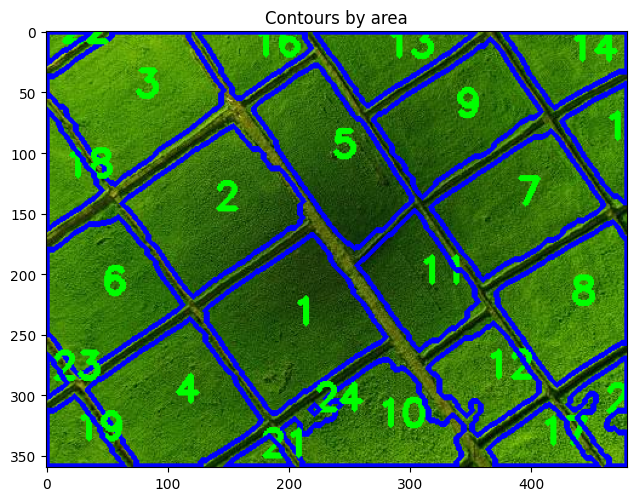

In [106]:

image = cv2.imread('C:/Users/My/Desktop/HW3_MULTI/farms_2.jpeg')
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow('Contours by area', image)